In [1]:
import pandas as pd
import numpy as np
import config1

import pickle
import json

D:\Project_D\CSV_FILE\diabetes.csv


In [2]:
dir(config1)

['ARTIFACTS_FOLDER_PATH',
 'CSV_FILE_PATH',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'model_file_path',
 'os']

In [3]:
df = pd.read_csv(config1.CSV_FILE_PATH)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [5]:
df.isna().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df['Glucose'].dtypes

dtype('int64')

In [7]:
import seaborn as sns

<AxesSubplot: xlabel='Glucose'>

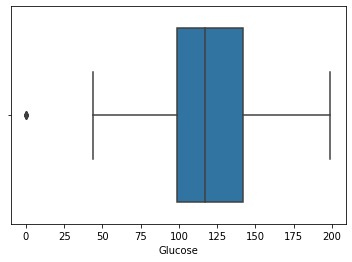

In [8]:
sns.boxplot(x=df['Glucose'])


<AxesSubplot: xlabel='Glucose', ylabel='Density'>

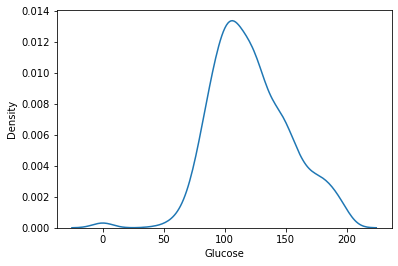

In [9]:
sns.kdeplot(df['Glucose'])

In [10]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
from sklearn.model_selection import train_test_split


In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=32,stratify=y)

In [14]:
log_reg = LogisticRegression()

In [15]:
log_reg

LogisticRegression()

In [16]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [17]:
y_train_pred= log_reg.predict(x_train)

In [18]:
y_train_pred[10:15]

array([0, 0, 1, 0, 0], dtype=int64)

In [19]:
y_train[10:15]

430    0
297    0
754    1
638    1
466    0
Name: Outcome, dtype: int64

In [37]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [21]:
clf_report =classification_report(y_train,y_train_pred)

conf_matrix =confusion_matrix(y_train,y_train_pred)

accuracy_score= accuracy_score(y_train,y_train_pred)

In [22]:
print(clf_report)

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       400
           1       0.71      0.57      0.63       214

    accuracy                           0.77       614
   macro avg       0.75      0.72      0.73       614
weighted avg       0.76      0.77      0.76       614



In [23]:
print(conf_matrix)

[[350  50]
 [ 93 121]]


In [24]:
print(accuracy_score)

0.7671009771986971


In [25]:
y_test_pred = log_reg.predict(x_test)

In [26]:
y_test[10:15]

304    0
486    0
741    0
705    0
225    0
Name: Outcome, dtype: int64

In [27]:
y_test_pred[10:15]

array([0, 0, 0, 0, 0], dtype=int64)

In [28]:
clf_report_test =classification_report(y_test,y_test_pred)

conf_matrix_test =confusion_matrix(y_test,y_test_pred)

# accuracy_score_test= accuracy_score(y_test,y_test_pred)

In [29]:
conf_matrix_test

array([[92,  8],
       [27, 27]], dtype=int64)

In [30]:
print(clf_report_test)

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       100
           1       0.77      0.50      0.61        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.72       154
weighted avg       0.77      0.77      0.76       154



In [38]:
accuracy_score= accuracy_score(y_test,y_test_pred)

In [39]:
print(accuracy_score)

0.7727272727272727


In [ ]:
x.head(1).T

In [ ]:
x.columns.nunique()

In [ ]:
x.shape

In [ ]:
project_data ={'columns':x.columns.tolist()}
project_data

In [33]:
Glucose        =85.000
BloodPressure  =66.000
SkinThicknes   =29.000
Insulin        =0
BMI           =26.6
DiabetesPedigreeFunction=0.351
Age           =31


test_array =np.zeros(x.columns.shape)

test_array[0]=Glucose
test_array[1]=BloodPressure
test_array[2]=SkinThicknes
test_array[3]=Insulin
test_array[4]=BMI
test_array[5]=DiabetesPedigreeFunction
test_array[6]=Age

predict_outcome = log_reg.predict([test_array])[0]
predict_outcome

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0

In [34]:
with open ('log_reg.pkl','wb') as f :
    
    pickle.dump(log_reg,f)

In [40]:
with open('project_data.json','w') as f:
    json.dump(project_data,f)

NameError: name 'project_data' is not defined

In [ ]:
project_data ={'columns':x.columns.tolist()}
project_data

In [71]:
type(x.columns)

pandas.core.indexes.base.Index

In [72]:
x.columns.shape

(7,)

In [57]:
array1= np.zeros(5)
array1

array([0., 0., 0., 0., 0.])

In [64]:
project_data['columns']

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']